In [2]:
import osmnx as ox

In [3]:
# X = ox.graph_from_place('Chicago, Illinois, USA', network_type='walk')

In [4]:
# X_undirected = ox.save_load.get_undirected(X)

In [5]:
# G = ox.save_load.save_graphml(X_undirected, filename='Chicago.ud.graphml', folder=None)

In [6]:
# G = ox.save_load.load_graphml('Chicago.ud.graphml', folder=None)

In [7]:
# ox.plot.plot_graph(G)

In [23]:
def get_bounding_box(n_lat, s_lat, e_lon, w_lon): 
    B = ox.core.graph_from_bbox(41.9,41.8, -87.6, -87.7, network_type= 'walk', simplify=True, \
                                retain_all=False, truncate_by_edge=False, name='bounded', \
                                timeout=180, memory=None, max_query_area_size=2500000000, \
                                clean_periphery=True, infrastructure='way["highway"]', custom_filter=None)
    B_undirected = ox.save_load.get_undirected(B)
    
    return B_undirected 

In [27]:
B_undirected = get_bounding_box(41.8, 41.7, -87.6, -87.7)

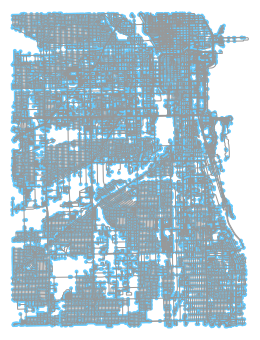

(<Figure size 437.263x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a5e597748>)

In [28]:
ox.plot.plot_graph(B_undirected) 

In [46]:
nodes = list(B_undirected.nodes(data = True)) 

In [64]:
# filter out edges corresponding to alleys because no safety score for them
edges = [(start, end, attrs) for (start, end, attrs) in B_undirected.edges(data = True) if 'name' in attrs.keys()]